In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [5]:
raw_df = pd.read_csv(f'{Path.cwd()}/../datasets/bank_marketing_original.csv', sep=';')

In [ ]:
raw_df.columns.size

In [7]:
raw_df.rename(columns={'y': 'deposit'}, inplace=True)

In [8]:
for i in raw_df.columns:
    print(f"- \"{i}\"")

- "age"
- "job"
- "marital"
- "education"
- "default"
- "balance"
- "housing"
- "loan"
- "contact"
- "day"
- "month"
- "duration"
- "campaign"
- "pdays"
- "previous"
- "poutcome"
- "deposit"


In [ ]:
raw_df.info()

In [ ]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(raw_df)))

In [9]:
#find percentage of missing values for each column
missing_values = raw_df.isnull().mean()*100

missing_values.sum()

0.0

In [10]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month','poutcome']
numerical_columns = ['age', 'balance', 'day','duration', 'pdays', 'campaign', 'previous']
binary_columns = ['default', 'housing', 'loan']

In [11]:
raw_df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [12]:
# map income labels to binary values
raw_df['deposit'] = raw_df['deposit'].map({'no': 0, 'yes': 1})

In [13]:
raw_df['deposit'].value_counts()

0    39922
1     5289
Name: deposit, dtype: int64

<AxesSubplot: title={'center': 'Deposit value counts'}>

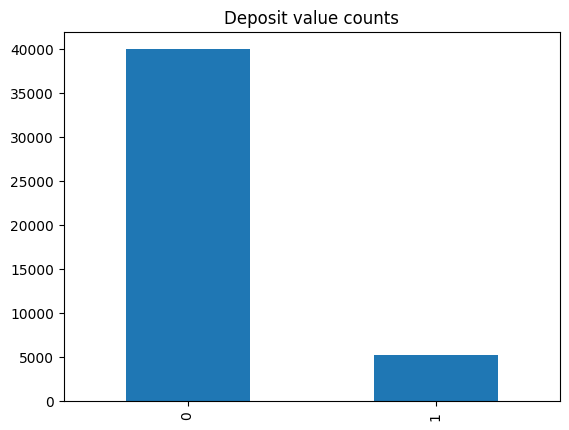

In [14]:
raw_df['deposit'].value_counts().plot.bar(title = 'Deposit value counts')


In [ ]:
raw_df.head()

In [15]:
# One-hot encode categorical columns
raw_one_hot_encoded = raw_df.copy()

for cat_col in cat_columns:
    # if raw_df[cat_col].nunique() <= 15:
    print(f"One-hot encoding column {cat_col}")

    # Perform one-hot encoding using pd.get_dummies()
    encoded_column = pd.get_dummies(raw_df[cat_col], prefix=cat_col, prefix_sep="__")

    print(f"One hot encoded column {cat_col} has {encoded_column.shape[1]} new features")
    
    # Drop the original categorical column
    encoded_df = raw_one_hot_encoded.drop(columns=[cat_col])
    
    # Concatenate the one-hot encoded columns to the DataFrame
    raw_one_hot_encoded = pd.concat([encoded_df, encoded_column], axis=1)

raw_one_hot_encoded

One-hot encoding column job
One hot encoded column job has 12 new features
One-hot encoding column marital
One hot encoded column marital has 3 new features
One-hot encoding column education
One hot encoded column education has 4 new features
One-hot encoding column contact
One hot encoded column contact has 3 new features
One-hot encoding column month
One hot encoded column month has 12 new features
One-hot encoding column poutcome
One hot encoded column poutcome has 4 new features


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month__jun,month__mar,month__may,month__nov,month__oct,month__sep,poutcome__failure,poutcome__other,poutcome__success,poutcome__unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
# label encode binary categorical columns
for col in binary_columns:
    _encoder = LabelEncoder()
    _encoder.fit(raw_one_hot_encoded[col])

    # Some logging
    print(f"Number Unique Classes of LabelEncoding in column {col}: {len(np.unique(_encoder.classes_))}")
    
    raw_one_hot_encoded[col] = _encoder.transform(raw_one_hot_encoded[col])

Number Unique Classes of LabelEncoding in column default: 2
Number Unique Classes of LabelEncoding in column housing: 2
Number Unique Classes of LabelEncoding in column loan: 2


In [17]:
# standard scale numerical columns
for col in numerical_columns:
    _scaler = StandardScaler()
    raw_one_hot_encoded[col] = _scaler.fit_transform(raw_one_hot_encoded[col].to_numpy().reshape(-1, 1))

In [ ]:
raw_one_hot_encoded

In [ ]:
raw_df['deposit'].value_counts()

In [18]:
for i in raw_one_hot_encoded.columns:
    print(f"- \"{i}\"")

- "age"
- "default"
- "balance"
- "housing"
- "loan"
- "day"
- "duration"
- "campaign"
- "pdays"
- "previous"
- "deposit"
- "job__admin."
- "job__blue-collar"
- "job__entrepreneur"
- "job__housemaid"
- "job__management"
- "job__retired"
- "job__self-employed"
- "job__services"
- "job__student"
- "job__technician"
- "job__unemployed"
- "job__unknown"
- "marital__divorced"
- "marital__married"
- "marital__single"
- "education__primary"
- "education__secondary"
- "education__tertiary"
- "education__unknown"
- "contact__cellular"
- "contact__telephone"
- "contact__unknown"
- "month__apr"
- "month__aug"
- "month__dec"
- "month__feb"
- "month__jan"
- "month__jul"
- "month__jun"
- "month__mar"
- "month__may"
- "month__nov"
- "month__oct"
- "month__sep"
- "poutcome__failure"
- "poutcome__other"
- "poutcome__success"
- "poutcome__unknown"


In [ ]:
raw_one_hot_encoded.to_csv(f'{Path.cwd()}/../datasets/bank_marketing_preprocessed.csv', index=False)

<AxesSubplot: >

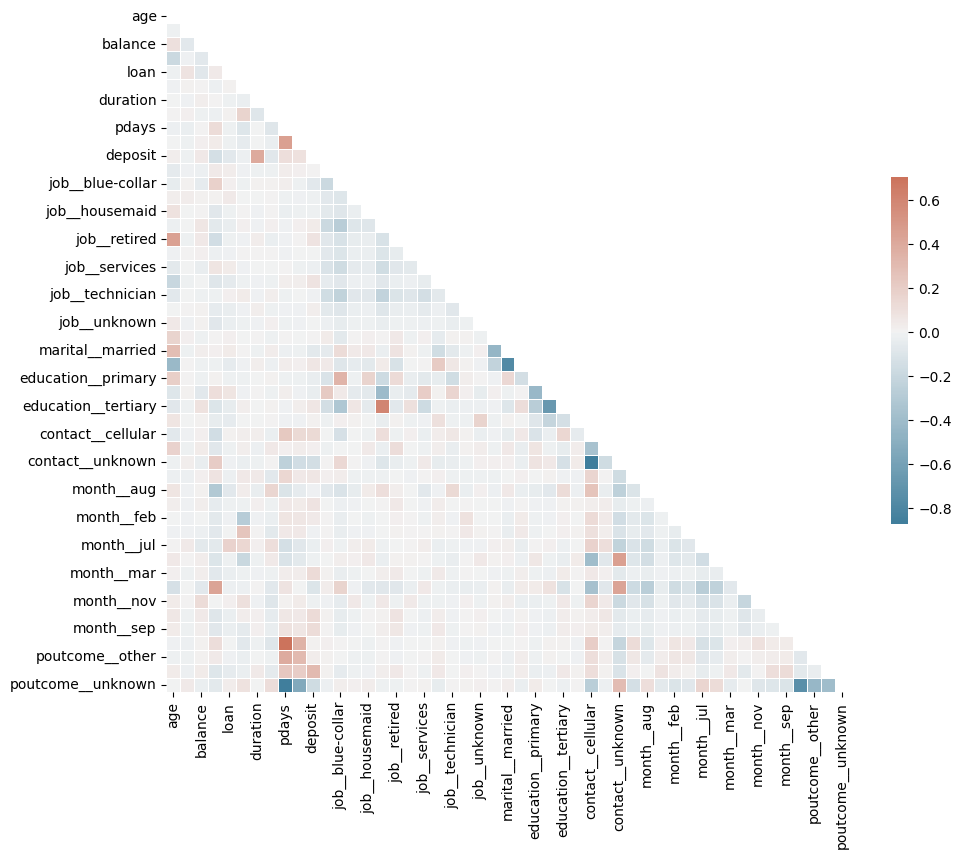

In [19]:
corr = raw_one_hot_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})